In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#---Open the look-up-table made in water_vapor_abs
mass_ext_df_13 = pd.read_pickle('tables/mass_ext_band13')
mass_ext_df_14 = pd.read_pickle('tables/mass_ext_band14')
mass_ext_df_07 = pd.read_pickle('tables/mass_ext_band07')

#---Open the optical mass made in water_vapor_profile
optical_mass_df = pd.read_pickle('tables/optical_mass_example')

In [3]:
mass_ext_df_13

,1013.171226,911.854103,810.536981,709.219858,607.902736,506.585613,405.268490,303.951368,202.634245,101.317123
174,0.000085,0.000085,0.000085,0.000085,0.000085,0.000085,0.000086,0.000086,0.000086,0.000086
184,0.000134,0.000135,0.000135,0.000135,0.000135,0.000136,0.000136,0.000136,0.000136,0.000136
194,0.000205,0.000206,0.000206,0.000207,0.000207,0.000207,0.000208,0.000208,0.000208,0.000208
204,0.000304,0.000304,0.000305,0.000305,0.000306,0.000306,0.000307,0.000307,0.000308,0.000308
214,0.000436,0.000437,0.000438,0.000438,0.000439,0.000440,0.000440,0.000441,0.000441,0.000441
224,0.000610,0.000611,0.000612,0.000613,0.000614,0.000615,0.000616,0.000616,0.000617,0.000617
234,0.000833,0.000835,0.000836,0.000838,0.000839,0.000840,0.000841,0.000842,0.000843,0.000843
244,0.001116,0.001118,0.001120,0.001121,0.001123,0.001124,0.001126,0.001127,0.001128,0.001128
254,0.001468,0.001470,0.001473,0.001475,0.001477,0.001479,0.001480,0.001482,0.001483,0.001484
264,0.001901,0.001904,0.001906,0.001909,0.001911,0.001914,0.001916,0.001918,0.001919,0.001920


In [4]:
optical_mass_df

,Optical Mass,Temperature
1000.0,60.558811,298.361359
975.0,55.662526,296.960083
950.0,51.002379,295.527649
925.0,46.582313,294.047638
900.0,42.395465,292.535461
850.0,35.290392,288.929932
800.0,31.486416,284.115479
750.0,28.911608,278.982178
700.0,25.940340,273.714355
650.0,13.281299,269.702179


Using look-up-table:

In [5]:
temperature_point = 292
pressure_point = 900

#---Find the nearest temperature and pressure indices
nearest_temperature = mass_ext_df_13.index[((mass_ext_df_13.index.values - temperature_point)**2).argmin()]
nearest_pressure = mass_ext_df_13.columns[((mass_ext_df_13.columns.values - pressure_point)**2).argmin()]

#---Query the lookup table with the nearest indices
nearest_value = mass_ext_df_13.loc[nearest_temperature, nearest_pressure]

print("Nearest temperature:", nearest_temperature)
print("Nearest pressure:", nearest_pressure)
print("Nearest value in the lookup table:", nearest_value)

Nearest temperature: 284
Nearest pressure: 911.854103343465
Nearest value in the lookup table: 0.003062262685884452


In [6]:
optical_thickness = []
pressure_profile = range(1000, 0, -100)

for pressure_value in pressure_profile:
    temperature_value = optical_mass_df.loc[pressure_value].Temperature
    optical_mass_value = optical_mass_df.loc[pressure_value]['Optical Mass']

    #---Find the nearest temperature and pressure indices
    nearest_temperature = mass_ext_df_13.index[((mass_ext_df_13.index.values - temperature_value)**2).argmin()]
    nearest_pressure = mass_ext_df_13.columns[((mass_ext_df_13.columns.values - pressure_value)**2).argmin()]

    #---Query the lookup table with the nearest indices
    mass_ext_value = mass_ext_df_13.loc[nearest_temperature, nearest_pressure]

    print("Profile:", pressure_value, round(temperature_value, 1), "LUT:", round(nearest_pressure,1), nearest_temperature)
    print("Optical mass:", round(optical_mass_value,1), "Mass ext:", round(mass_ext_value,1))

    optical_thickness.append(optical_mass_value*mass_ext_value)


Profile: 1000 298.4 LUT: 1013.2 284
Optical mass: 60.6 Mass ext: 0.0
Profile: 900 292.5 LUT: 911.9 284
Optical mass: 42.4 Mass ext: 0.0
Profile: 800 284.1 LUT: 810.5 284
Optical mass: 31.5 Mass ext: 0.0
Profile: 700 273.7 LUT: 709.2 274
Optical mass: 25.9 Mass ext: 0.0
Profile: 600 266.4 LUT: 607.9 264
Optical mass: 2.9 Mass ext: 0.0
Profile: 500 258.0 LUT: 506.6 254
Optical mass: 8.8 Mass ext: 0.0
Profile: 400 247.4 LUT: 405.3 244
Optical mass: 0.1 Mass ext: 0.0
Profile: 300 236.6 LUT: 304.0 234
Optical mass: 1.0 Mass ext: 0.0
Profile: 200 221.4 LUT: 202.6 224
Optical mass: 0.0 Mass ext: 0.0
Profile: 100 210.5 LUT: 101.3 214
Optical mass: 0.0 Mass ext: 0.0


I believe optical thickness should be on the scale of 0.1 to 10, roughly.

In [7]:
data = {
    'Optical Thickness': optical_thickness
}

optical_thickness_df = pd.DataFrame(data, index=pressure_profile)
optical_thickness_df

,Optical Thickness
1000,0.185186
900,0.129826
800,0.096555
700,0.063199
600,0.005565
500,0.013086
400,0.000138
300,0.000864
200,0.000019
100,0.000001


/var/folders/pd/x01_y6d52zj47w6_m5_h_8f80000gr/T/ipykernel_33108/2455576853.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(minor='off',labels=yticklabels)


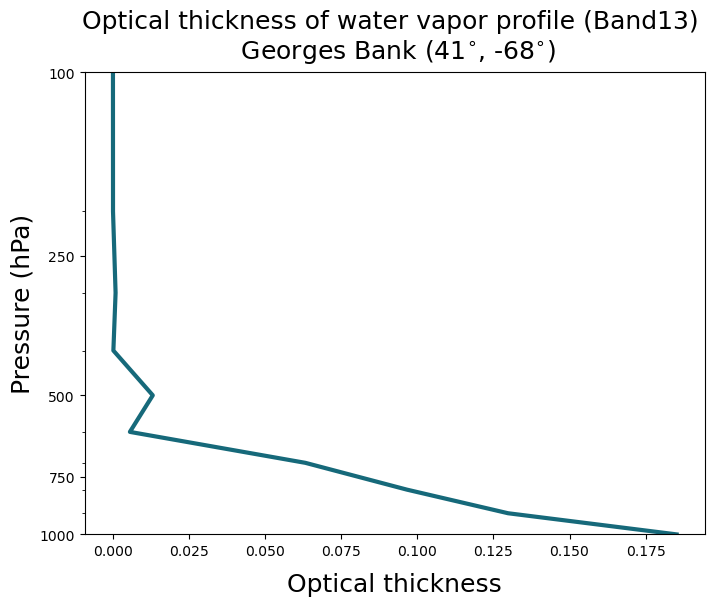

In [8]:
fig, ax = plt.subplots(1, figsize=(8,6))

ax.plot(optical_thickness_df, optical_thickness_df.index, c='#16697A', linewidth=3)

ax.set_title('Optical thickness of water vapor profile (Band13) \n Georges Bank (41$^{\circ}$, -68$^{\circ}$)', size=18, pad=10)
ax.set_xlabel('Optical thickness', size=18, labelpad=10)
ax.set_ylabel('Pressure (hPa)', size=18)

#---Y-labels took some wrangling
plt.yscale('log')
ax.set_ylim([1000,100])
ax.set_yticks([1000,750,500,250,100])
yticklabels = ['1000','750','500','250','100']
ax.set_yticklabels(yticklabels)
plt.gca().set_yticklabels(minor='off',labels=yticklabels)

plt.show()

Calculating transmittance from optical thickness ($\tau$):
* what does $\mu_{\text{sat}}$ refer to?

$$
T_\lambda(z, \text{TOA}) = \text{exp}\left(-\sum_z^\text{TOA} \frac{\tau}{\mu_{\text{sat}}}\right)
$$